In [3]:
import os
results = os.listdir("set_mlp_cifar10_results")
results

['neuroncentralityset.csv', 'randomset.csv']

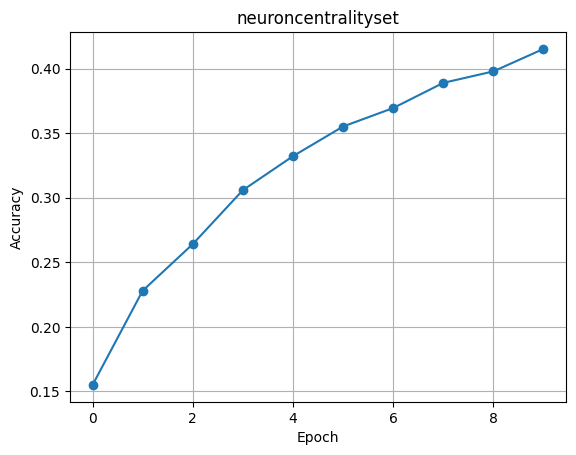

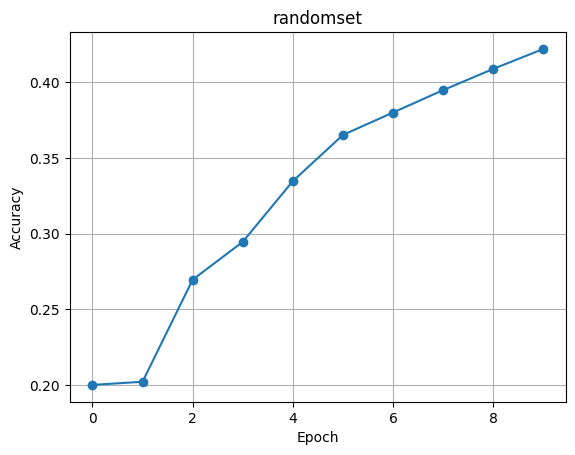

In [11]:
import csv
import matplotlib.pyplot as plt

rs = {}

for file in results:
    with open(os.path.join("set_mlp_cifar10_results", file), "r") as f:
        reader = csv.reader(f)
        accs = [float(row[0]) for row in reader if row]
        name = file[:-4]
        rs[name] = accs
        plt.figure()
        plt.plot(accs, marker='o')
        plt.title(name)
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.show()


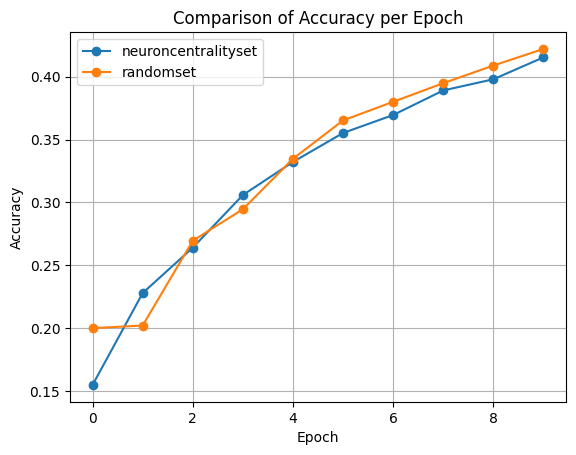

In [12]:
plt.figure()
for name, accs in rs.items():
    plt.plot(accs, marker='o', label=name)
plt.title('Comparison of Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()